In [1]:
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as ds
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Lasso

In [2]:
X_train, y_train = ds.make_classification(n_features=2,
    n_redundant=0, n_informative=1,
    n_clusters_per_class=1, random_state=3216)
ix0 = [i for i,x in enumerate(y_train) if x == 0]
ix1 = [i for i,x in enumerate(y_train) if x == 1]

In [4]:
model = Perceptron()
model.fit(X_train,y_train)

C:\Miniconda3\envs\ADS\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [5]:
def heaviside(x1, x2, th0, th1, th2):
    return -np.sign(th0 + x1*th1 + x2*th2)

In [11]:
x1 = np.arange(-3.1, 3.1, 0.005)
x2 = np.arange(-3.1, 3.1, 0.005)
x1,x2 = np.meshgrid(x1, x2)
y_pred = heaviside(x1,x2,model.intercept_[0],
    model.coef_[0][0],model.coef_[0][1])

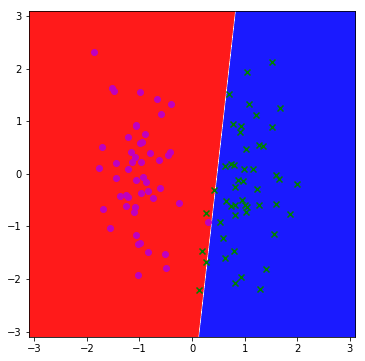

In [12]:
extent = -3.1, 3.1, -3.1, 3.1
fig = plt.figure(figsize=(10,6))
plt.imshow(y_pred, cmap=cm.bwr, alpha=.9, interpolation='bilinear',extent = extent)
plt.scatter(X_train[ix0,0],X_train[ix0, 1],marker='o',color='m')
plt.scatter(X_train[ix1,0],X_train[ix1, 1],marker='x',color='g')
plt.show()